# mobile Wallet Ehancement:- (QuickTeller)

In this project we`(data science team)` are been paired with the `full stack team` to carry out a task, we are been asked to assist the `full stack team` to build a model that could help them easily understand what the `user` requirement from the app.

### Importing libraries

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import  SimpleImputer
from sklearn.pipeline import make_pipeline

warnings.filterwarnings('ignore')

### Exploratory Data Analysis:

Before build our model we will like to have an indepth look of the data we are working on.

In [2]:
df = pd.read_csv(r"C:\Users\gbest\Desktop\Mobile_Wallet_Data.csv")
print("info:", df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18499 entries, 0 to 18498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             18499 non-null  int64 
 1   Feedback_Date       18499 non-null  object
 2   Feed_Type           18499 non-null  object
 3   Feed_Content        18496 non-null  object
 4   Appication_Version  18499 non-null  object
 5   User_Rating         18499 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 867.3+ KB
info: None


,user_id,Feedback_Date,Feed_Type,Feed_Content,Appication_Version,User_Rating
0,2701470357,12/10/2021 12:36,Usability,Things were great earlier but since the last u...,1.0.0,3
1,2701470357,12/10/2021 12:36,Bug report,Love this app but I wish we could still do adv...,1.0.0,5
2,2701470357,12/10/2021 12:37,Bug report,Woke garbage,1.0.0,1
3,2701470357,12/10/2021 12:37,Usability,Gives you a few likes mabey 10 then expects yo...,1.0.0,1
4,2701470357,12/10/2021 12:39,Usability,It's good..,1.0.0,3


Read the above data into a tabular form using `pandas`.

In [3]:
rating = (df['User_Rating'].value_counts(normalize=True) * 100).round(2)
rating

1    47.32
5    25.80
4    10.12
2     9.01
3     7.76
Name: User_Rating, dtype: float64

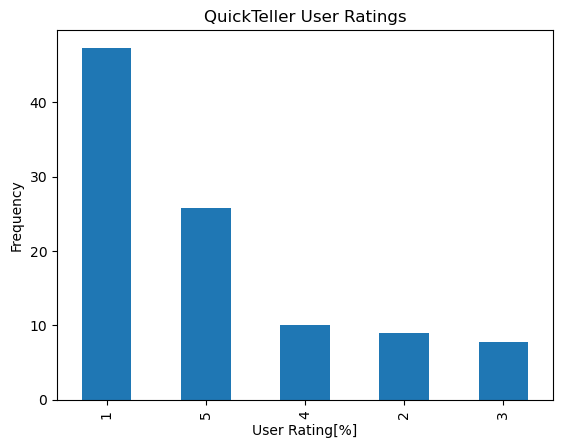

In [4]:
rating.plot(kind='bar')
plt.xlabel('User Rating[%]')
plt.ylabel('Frequency')
plt.title('QuickTeller User Ratings');

From the `user rating` detail above we noticed that:
 * The lowest(1) rating has more rating than than the rating 2-5, with over 47% total rating count.
 * and that rating 5 which is the highest rating has the secnd hightest rating 25.80% rating count.
 * from rating 2-4 all have rating count of 10% downwards.

In [5]:
highest_download = df['Appication_Version'].value_counts()

In [6]:
highest_download.head(10)

1.11.0     6421
1.1.0      2258
1.0.0      1282
1.11.1     1020
1.10.1      926
1.12.0      920
1.10.7      712
1.10.2      668
1.12.1      660
1.124.1     517
Name: Appication_Version, dtype: int64

Here we saw the top `10` application version with most downloads

In [7]:
feed_type = (df['Feed_Type'].value_counts(normalize=True) * 100).round(2)
feed_type

Usability          40.13
Performance        28.42
Feature request    15.82
Bug report         15.63
Name: Feed_Type, dtype: float64

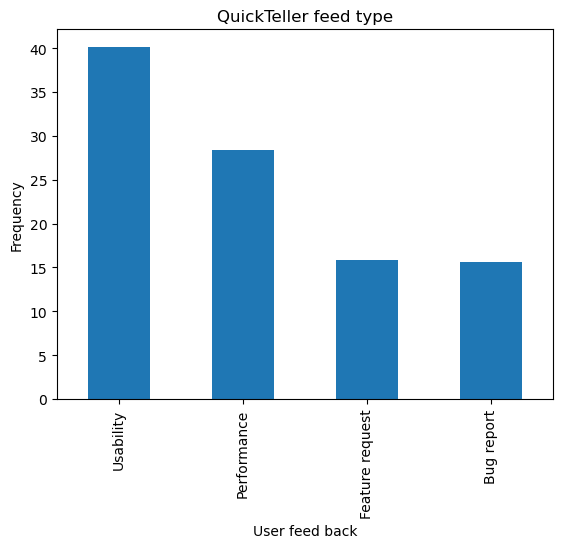

In [8]:
feed_type.plot(kind='bar')
plt.xlabel('User feed back')
plt.ylabel('Frequency')
plt.title('QuickTeller feed type');

The Feedback Type column indicate the type or category of feedback the users has provide regarding the app.

 * usability has the highest number of total count with over 40% followed by.
 * performance has over 28% 
 * bug report and feature request 15% each.
 
  **NEXT:-** we are going to go through the user rating on each of the feedback type to see how they affect the useage of the app and get their individual ratings.

In [9]:
usable = df['Feed_Type'] == 'Usability'
print('shape:', df[usable].shape)
df[usable].head()

shape: (7424, 6)


,user_id,Feedback_Date,Feed_Type,Feed_Content,Appication_Version,User_Rating
0,2701470357,12/10/2021 12:36,Usability,Things were great earlier but since the last u...,1.0.0,3
3,2701470357,12/10/2021 12:37,Usability,Gives you a few likes mabey 10 then expects yo...,1.0.0,1
4,2701470357,12/10/2021 12:39,Usability,It's good..,1.0.0,3
9,2701470357,12/10/2021 12:41,Usability,An ego based app full of fake profiles. The pe...,1.0.0,1
11,1132018747,12/10/2021 12:42,Usability,Good for nothing completely fake app... Just s...,1.0.0,1


In [10]:
usability_rating = (df[usable]['User_Rating'].value_counts(normalize=True)) * 100
usability_rating

1    46.134159
5    25.592672
4    10.789332
2     9.630927
3     7.852909
Name: User_Rating, dtype: float64

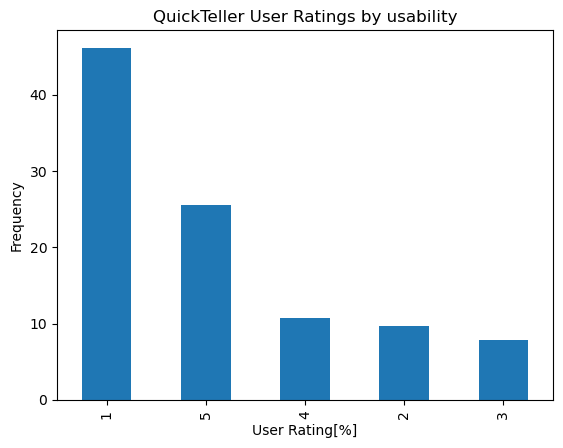

In [71]:
usability_rating.plot(kind='bar')
plt.xlabel('User Rating[%]')
plt.ylabel('Frequency')
plt.title('QuickTeller User Ratings by usability');

**USABILITY RATING**

The usability entails how difficult or ease the app is to use by the user and.
    
    * rating 1 has the highest % with over 46% followed by.
    * rating 5 has over 25% and.
    * from 2-4 10% and below

which means that from rating 1-2 found the app hard to use, and 4-5 found it ease to use.

In [12]:
performance = df['Feed_Type'] == 'Performance'
print('shape:', df[performance].shape)
df[performance].head()

shape: (5257, 6)


,user_id,Feedback_Date,Feed_Type,Feed_Content,Appication_Version,User_Rating
6,1132018747,12/10/2021 12:40,Performance,The problem with this app is there's no way to...,1.0.0,3
7,1132018747,12/10/2021 12:40,Performance,App does not work whatsoever right now,1.0.0,1
8,2701470357,12/10/2021 12:41,Performance,I'm in the west coast. The app shows me in Mas...,1.0.0,1
10,2701470357,12/10/2021 12:42,Performance,This app will lead you in the #ShraddhaWalkar ...,1.0.0,1
14,2671905927,12/10/2021 12:45,Performance,"Wow, they throttled back the number of daily s...",1.0.0,1


In [13]:
performance_rating = (df[performance]['User_Rating'].value_counts(normalize=True)) * 100
performance_rating

1    48.031196
5    26.916492
4     9.339928
2     8.312726
3     7.399658
Name: User_Rating, dtype: float64

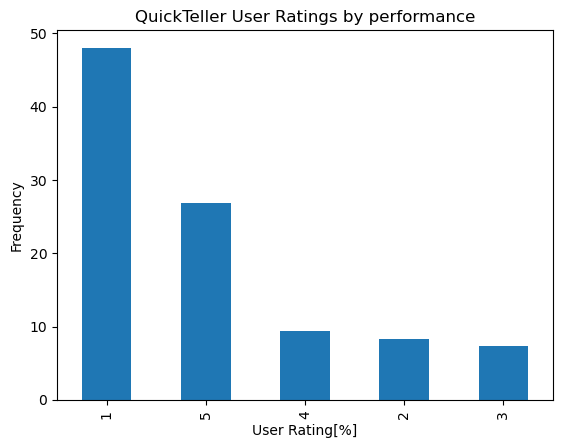

In [14]:
performance_rating.plot(kind='bar')
plt.xlabel('User Rating[%]')
plt.ylabel('Frequency')
plt.title('QuickTeller User Ratings by performance');

**PERFORMANCE RATING**

The performance entails how fast or slow the speed of app is to the users and.
    
    * rating 1 has the highest % with over 48% followed by.
    * rating 5 has over 26% and.
    * from 2-4 below 10%.

which means that from rating 1-2 found the app speed slow to use, and 4-5 found the app speed fast to use.

In [15]:
feature = df['Feed_Type'] == 'Feature request'
print('shape:', df[feature].shape)
df[feature].head()

shape: (2927, 6)


,user_id,Feedback_Date,Feed_Type,Feed_Content,Appication_Version,User_Rating
17,2671905927,12/10/2021 12:52,Feature request,Great app thanks to bumble who gives me my sou...,1.0.0,5
23,2806578304,12/10/2021 12:58,Feature request,I tried to used this app for almost 1week just...,1.0.0,1
5306,220703009,12/24/2021 5:39,Feature request,Okay still haven't mett anyone but I did hear ...,1.10.1,5
5307,1127595451,12/24/2021 5:39,Feature request,Great app to meet new people,1.10.1,5
5308,466739782,12/24/2021 5:40,Feature request,It is great. But I think there must be an opti...,1.10.1,4


In [16]:
feature_rating = (df[feature]['User_Rating'].value_counts(normalize=True)) * 100
feature_rating

1    49.880424
5    24.598565
4     8.951145
2     8.370345
3     8.199522
Name: User_Rating, dtype: float64

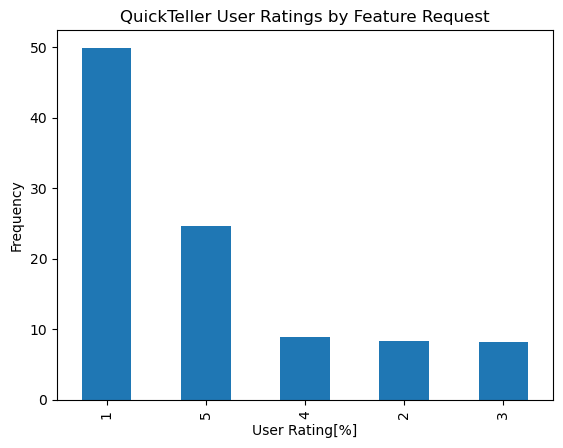

In [17]:
feature_rating.plot(kind='bar')
plt.xlabel('User Rating[%]')
plt.ylabel('Frequency')
plt.title('QuickTeller User Ratings by Feature Request');

**FEATURE REQUEST RATING**

The feature request entails that the user request for some added feature to the app.
    
    * rating 1 has the highest % with over 49% followed by.
    * rating 5 has over 24% and.
    * from 2-4 10% and below.

In [18]:
bug = df['Feed_Type'] == 'Bug report'
print('shape:', df[feature].shape)
df[feature].head()

shape: (2927, 6)


,user_id,Feedback_Date,Feed_Type,Feed_Content,Appication_Version,User_Rating
17,2671905927,12/10/2021 12:52,Feature request,Great app thanks to bumble who gives me my sou...,1.0.0,5
23,2806578304,12/10/2021 12:58,Feature request,I tried to used this app for almost 1week just...,1.0.0,1
5306,220703009,12/24/2021 5:39,Feature request,Okay still haven't mett anyone but I did hear ...,1.10.1,5
5307,1127595451,12/24/2021 5:39,Feature request,Great app to meet new people,1.10.1,5
5308,466739782,12/24/2021 5:40,Feature request,It is great. But I think there must be an opti...,1.10.1,4


In [19]:
bug_rating = (df[bug]['User_Rating'].value_counts(normalize=True)) * 100
bug_rating

1    46.454514
5    25.527499
4    10.999654
2     9.304739
3     7.713594
Name: User_Rating, dtype: float64

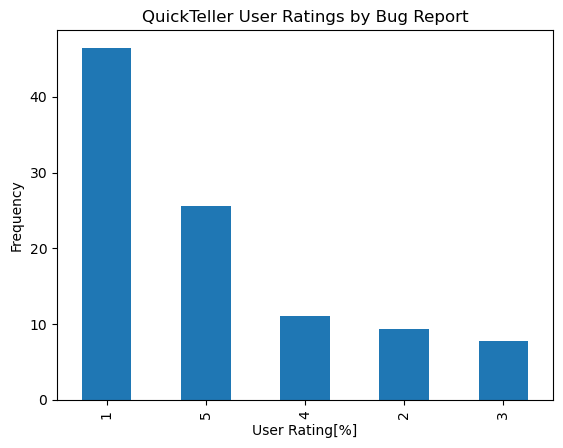

In [20]:
bug_rating.plot(kind='bar')
plt.xlabel('User Rating[%]')
plt.ylabel('Frequency')
plt.title('QuickTeller User Ratings by Bug Report');

**BUG REPORT RATING**

The bug report entails that user encount issues or problem with the app while using it.
    
    * rating 1 has the highest % with over 46% followed by.
    * rating 5 has over 25% and.
    * from 2-4 10% and below

## splitting the data for model building

In [21]:
target = 'User_Rating'
feature = ['Feed_Content']

y = df[target]
X = df[feature]

X.head()

,Feed_Content
0,Things were great earlier but since the last u...
1,Love this app but I wish we could still do adv...
2,Woke garbage
3,Gives you a few likes mabey 10 then expects yo...
4,It's good..


In [22]:
y.head()

0    3
1    5
2    1
3    1
4    3
Name: User_Rating, dtype: int64

we have splitted the into our `feature matrix(X)['feed content']` and `target vector(y)[user rating]`.

## Baseline

In [23]:
y_mean = y.mean()
y_pred_baseline = [y_mean] * len(y)
mae_baseline = mean_absolute_error(y, y_pred_baseline)

print('Mean Rating:', y_mean)
print('Mae Baseline:', mae_baseline)

Mean Rating: 2.580842207686902
Mae Baseline: 1.6006048934417894


used **mean absorlute error** to get the averge error to beat after building and training our model

In [58]:
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (14799, 1)
y_train: (14799,)
X_test: (3700, 1)
y_test: (3700,)


split the `X` and `y` into a `train set` and `test set`, we are going to use the `train set`  to train the model and use the `test set` to test the performance of the model and see if it beat the baseline.

## Iteration

In [59]:
ohe = OneHotEncoder(use_cat_names=True)

ohe.fit(X_train)

XT_train = ohe.transform(X_train)
print(XT_train.shape)
XT_train.head()

(14799, 13317)


,Feed_Content_Things were great earlier but since the last update I'm not getting any notifications when someone is messaging me. Please try to tix it asap.,Feed_Content_Love this app but I wish we could still do advanced fliters for free and I wouldn't mind paying but everything's to expensive right now. Please put at least advanced filters back on for free. I'm seriously looking for a potential relationship.,Feed_Content_Woke garbage,Feed_Content_Gives you a few likes mabey 10 then expects you to buy more I've been out of swipes for 42 hours at a time this is a scam for money on top of obvious fake accounts what a joke,Feed_Content_It's good..,Feed_Content_Im not getting how to pay for subscribe trying but unable,Feed_Content_The problem with this app is there's no way to message someone you like,Feed_Content_App does not work whatsoever right now,Feed_Content_I'm in the west coast. The app shows me in Massachusetts and I have to pay money to change my location. Emails to devs doesn't do anything. What a terrible experience and money gobbling tactics.,"Feed_Content_An ego based app full of fake profiles. The perfect platform for females to match, get their validation and not speak. Way too many bots too. Dating apps aren't generally great, but this one took the 😝",...,Feed_Content_I've had a lot of bot matches. If not none at all,"Feed_Content_I was reccomended this app because it had lgbtqia+ options. It started out great. Until i got likes. You cant even see your 'beeline' unless you purchase a membership. The only free thing you get is the ability to swipe left or right. Created with love? What love besides your apparent love for money? This app is useless unless youre prepared to spend money on it right away and there is nothing more infuriating when dating apps require a membership right away, just to see whos interested or talk.","Feed_Content_Terrible app, makes you pay for the undo button. I've missed so many opportunities from accidently swiping right.",Feed_Content_Reckons I'm under age when I'm 19 so cant even get past the mobile number or Facebook stage 🤦🤙,"Feed_Content_Limited likes, how can I find a match if it has limited likes. I can't even get a like so rare.",Feed_Content_You have to pay to see the people who liked you even though you liked them. It should be a match????,Feed_Content_ONLY UGLY PEOPLE COMPLAINS,"Feed_Content_I start use this app recently , but I think it's good .","Feed_Content_I was charged 2.99, 14 times! Without my authorization, I never even put my credit card in your app, yet I've been charged these, I don't even know what they are for? I tried Contacting customer service, but cannot find any email anywhere!.",Feed_Content_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Tranforming the X_train from string value to an integer

In [60]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
).fit(X_train, y_train)
model

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Feed_Content'], use_cat_names=True)),
                ('ridge', Ridge())])

## Evaluation

In [61]:
mae_train= mean_absolute_error(y_train, model.predict(X_train))
mae_test = mean_absolute_error(y_test, model.predict(X_test))

print("MAE training:", mae_train.round(2))
print("MAE test:", mae_test.round(2))

MAE training: 0.72
MAE test: 1.39


Both the **train(0.72)** and **test(1.39)** set beat the **baseline(1.60)**.

## communication

In [73]:
intercept = model.named_steps["ridge"].intercept_
coefficient = model.named_steps["ridge"].coef_
print("intercept:", intercept.round(2))
print("coefficient:", coefficient[:5].round(2))

intercept: 2.37
coefficient: [ 0.31  1.31 -0.69 -0.69  0.31]


Extracting the coefficient from the user_rating

In [74]:
feature_names = model.named_steps["onehotencoder"].get_feature_names()

Extracting the feature names from the feedback type.

In [64]:
feat_imp = pd.Series(coefficient, feature_names)

Concatinating the coef and feat names using pandas series

## Visualizing the feature name and the absolute value from the coefficient

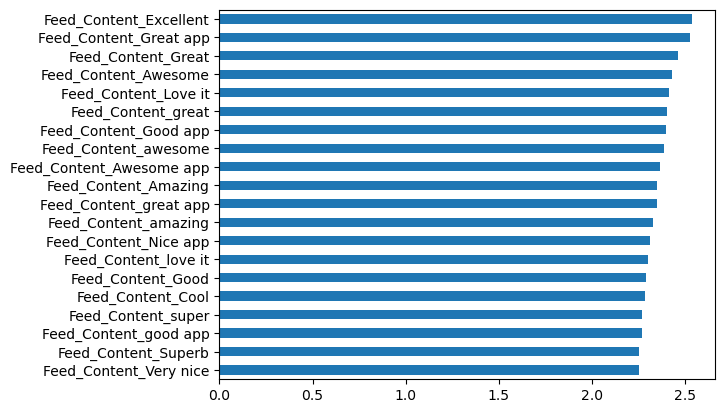

In [76]:
feat_imp.sort_values(key=abs).tail(20).plot(kind="barh");